Branden Frieden
u1038942
5/18/2023
CS6017
HW# 2

# Part 1 - Data Aquisition

In [3]:
from bs4 import BeautifulSoup
import urllib.request
import time
url = "https://news.ycombinator.com/?p="
for i in range(1, 6):
    # here we actually access the website
    newUrl = url+str(i)
    print(newUrl)
    with urllib.request.urlopen( newUrl ) as response:
        html = response.read()
        html = html.decode( 'utf-8' )

    # save the file
    with open( 'Hacker NewsP' + str(i) + '.html', 'w' ) as new_file:
        new_file.write(html)
    if i != 5:
        time.sleep(31)

https://news.ycombinator.com/?p=1
https://news.ycombinator.com/?p=2
https://news.ycombinator.com/?p=3
https://news.ycombinator.com/?p=4
https://news.ycombinator.com/?p=5


In [4]:
from bs4 import BeautifulSoup
HN = [BeautifulSoup( open("Hacker NewsP1.html"), "html.parser" ), BeautifulSoup( open("Hacker NewsP2.html"), "html.parser" ), BeautifulSoup( open("Hacker NewsP3.html"), "html.parser" ), BeautifulSoup( open("Hacker NewsP4.html"), "html.parser" ), BeautifulSoup( open("Hacker NewsP5.html"), "html.parser" )]

In [5]:
print(HN[1].prettify())


<html lang="en" op="news">
 <head>
  <meta content="origin" name="referrer"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="news.css?pkC4qHq0UrfIh2BRKmNb" rel="stylesheet" type="text/css"/>
  <link href="favicon.ico" rel="shortcut icon"/>
  <link href="rss" rel="alternate" title="RSS" type="application/rss+xml"/>
  <title>
   Hacker News
  </title>
 </head>
 <body>
  <center>
   <table bgcolor="#f6f6ef" border="0" cellpadding="0" cellspacing="0" id="hnmain" width="85%">
    <tr>
     <td bgcolor="#ff6600">
      <table border="0" cellpadding="0" cellspacing="0" style="padding:2px" width="100%">
       <tr>
        <td style="width:18px;padding-right:4px">
         <a href="https://news.ycombinator.com">
          <img height="18" src="y18.svg" style="border:1px white solid; display:block" width="18"/>
         </a>
        </td>
        <td style="line-height:12pt; height:10px;">
         <span class="pagetop">
          <b class="hnname">
    

In [6]:
allRanks = [x for x in range(1, 151)]

In [7]:
allTitles = []
for i in range(len(HN)):
    titles = HN[i].find_all( "span", {"class": "titleline"} )
    stringTitles = [ tag.get_text() for tag in titles ]
    for j in range(len(stringTitles)):
        allTitles.append(stringTitles[j])
display(allTitles)

["NPM won't publish packages containing the word keygen (mamot.fr)",
 'I booted Linux 292,612 times (rwmj.wordpress.com)',
 'The Deliberate Practice Guide (fs.blog)',
 'Launch HN: Credal.ai (YC W23) – Data Safety for Enterprise AI',
 'Dumb and Gets Things Done (johndcook.com)',
 'Always the Same Warning Signs (science.org)',
 'Show HN: Scribbler – Podcast Summaries Using GPT (scribbler.so)',
 'Reddit Is OpenAI’s Moat? (cyberdemon.org)',
 "SimulaVR's Reaction to Apple (simulavr.com)",
 'Serotonin booster leads to increased functional brain connectivity (alphagalileo.org)',
 'How to Listen to Database Changes Using Postgres Triggers in Elixir (peterullrich.com)',
 'Skio (YC S20) – Subscriptions for Shopify, ReCharge Migrations Is Hiring (skio.com)',
 'Consciousness and Anaesthesia (2009) (nih.gov)',
 'Doas Mastery (2019) (tedunangst.com)',
 'A 5.7 Terapixel Mosaic of the Surface of Mars (kottke.org)',
 'RadioReference Complete Frequency Database (radioreference.com)',
 'MacOS X 10.1 (200

In [8]:
titleLengths = []
for title in allTitles:
    titleLengths.append(len(title))

In [9]:
from datetime import datetime, timezone
allTimes = []
for i in range(len(HN)):
    times = HN[i].find_all( "span", {"class": "age"} )
    stringTimes = []
    for tag in times:
        posted = datetime.strptime(tag['title'], '%Y-%m-%dT%H:%M:%S')
        now = datetime.now(timezone.utc)
        stringTimes.append(int(((now.day - posted.day) * 24 + (now.hour - posted.hour) + ((now.minute - posted.minute) / 60))))
    for j in range(len(stringTimes)):
        allTimes.append(stringTimes[j])
display(allTimes)


[1,
 1,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 9,
 6,
 3,
 6,
 34,
 8,
 1,
 6,
 23,
 3,
 3,
 16,
 9,
 9,
 19,
 10,
 0,
 11,
 19,
 26,
 19,
 12,
 19,
 0,
 3,
 27,
 2,
 34,
 13,
 19,
 14,
 21,
 29,
 1,
 3,
 22,
 22,
 15,
 15,
 25,
 18,
 2,
 1,
 22,
 19,
 22,
 37,
 15,
 21,
 40,
 44,
 28,
 24,
 17,
 38,
 17,
 24,
 12,
 11,
 18,
 19,
 16,
 14,
 13,
 20,
 18,
 17,
 40,
 23,
 3,
 18,
 21,
 30,
 5,
 20,
 9,
 22,
 25,
 14,
 5,
 44,
 41,
 21,
 40,
 46,
 8,
 19,
 40,
 15,
 24,
 31,
 1,
 15,
 11,
 17,
 44,
 22,
 7,
 17,
 31,
 27,
 44,
 45,
 46,
 2,
 39,
 17,
 12,
 35,
 40,
 18,
 31,
 41,
 19,
 50,
 15,
 35,
 7,
 21,
 6,
 40,
 24,
 38,
 40,
 13,
 46,
 47,
 41,
 42,
 43,
 40,
 15,
 37,
 40,
 18,
 15,
 15,
 26,
 1,
 5,
 15]

In [10]:
allScores = []
for i in range(len(HN)):
    subtexts = HN[i].find_all( "td", {"class": "subtext"} )
    subtextHTML = [ tag for tag in subtexts ]
    stringScores = []

    # finds all the subtext blocks (every entry has this)
    for st in subtextHTML:
        # finds score in the subtext if it exists (None if it doesn't)
        score = st.find( "span", {"class": "score"} )

        # use score if it exists, else enter 0 points
        if score is not None:
            stringScores.append(  int(''.join(filter(str.isdigit, score.get_text()))) )
        else:
            stringScores.append( 0 )

    for j in range(len(stringScores)):
        allScores.append(stringScores[j])
display(allScores)

[135,
 44,
 114,
 16,
 20,
 37,
 29,
 137,
 5,
 246,
 102,
 0,
 96,
 8,
 130,
 9,
 90,
 52,
 90,
 35,
 122,
 105,
 109,
 16,
 81,
 10,
 93,
 793,
 403,
 816,
 115,
 9,
 6,
 250,
 73,
 71,
 20,
 86,
 408,
 62,
 460,
 78,
 10,
 25,
 9,
 460,
 252,
 151,
 495,
 200,
 8,
 6,
 339,
 221,
 280,
 691,
 171,
 219,
 148,
 158,
 367,
 278,
 97,
 627,
 30,
 227,
 11,
 17,
 464,
 25,
 62,
 19,
 72,
 52,
 107,
 33,
 25,
 713,
 6,
 36,
 505,
 216,
 64,
 88,
 493,
 24,
 171,
 23,
 11,
 59,
 114,
 194,
 380,
 547,
 16,
 641,
 33,
 14,
 191,
 28,
 8,
 51,
 20,
 13,
 70,
 50,
 7,
 39,
 83,
 137,
 133,
 356,
 1928,
 13,
 387,
 37,
 5,
 220,
 49,
 64,
 42,
 261,
 478,
 328,
 14,
 133,
 9,
 358,
 10,
 293,
 116,
 26,
 189,
 26,
 229,
 388,
 163,
 49,
 131,
 87,
 33,
 39,
 185,
 6,
 7,
 7,
 128,
 38,
 4,
 28]

In [11]:
allComments = []
for i in range(len(HN)):
    subtexts = HN[i].find_all( "td", {"class": "subtext"} )
    subtextHTML = [ tag for tag in subtexts ]
    comments = []

    # finds all the subtext blocks (every entry has this)
    for st in subtextHTML:
        stString = st.text
        if stString.find('comment')!= -1:
            start = stString.index('comment')
            val = 0
            place = 1
            start -= 2
            while(stString[start].isdigit()):
                val += int(stString[start]) * place
                place *= 10
                start -= 1
            comments.append(val)
        else:
            comments.append(0)

    for j in range(len(comments)):
        allComments.append(comments[j])
display(allComments)

[99,
 5,
 49,
 3,
 7,
 7,
 5,
 154,
 0,
 192,
 34,
 0,
 78,
 0,
 44,
 0,
 126,
 4,
 17,
 14,
 87,
 107,
 117,
 9,
 15,
 1,
 14,
 327,
 257,
 300,
 44,
 3,
 0,
 277,
 66,
 16,
 10,
 22,
 171,
 81,
 197,
 49,
 4,
 14,
 0,
 173,
 172,
 94,
 155,
 46,
 1,
 1,
 71,
 300,
 92,
 296,
 98,
 71,
 73,
 24,
 178,
 326,
 48,
 167,
 1,
 65,
 0,
 3,
 230,
 1,
 14,
 9,
 28,
 26,
 19,
 1,
 2,
 136,
 0,
 25,
 322,
 88,
 87,
 46,
 486,
 33,
 100,
 2,
 13,
 19,
 59,
 371,
 240,
 432,
 1,
 295,
 24,
 0,
 213,
 8,
 1,
 6,
 6,
 1,
 11,
 8,
 5,
 32,
 14,
 65,
 86,
 50,
 585,
 0,
 136,
 23,
 1,
 52,
 17,
 25,
 5,
 329,
 449,
 150,
 1,
 70,
 13,
 151,
 6,
 510,
 25,
 3,
 110,
 1,
 120,
 89,
 89,
 16,
 7,
 14,
 10,
 13,
 299,
 1,
 1,
 1,
 47,
 54,
 0,
 17]

# Part 2 - Regression

In [12]:
import pandas as pd
import statsmodels.formula.api as sm



In [13]:
df = pd.DataFrame([allRanks, titleLengths, allTimes, allScores, allComments]).transpose()
df.columns = ['Ranks', 'titleLengths', 'ages', 'scores', 'comments']
print(df)

     Ranks  titleLengths  ages  scores  comments
0        1            64     1     135        99
1        2            49     1      44         5
2        3            39     3     114        49
3        4            61     0      16         3
4        5            41     0      20         7
..     ...           ...   ...     ...       ...
145    146            82    15       7         1
146    147            30    26     128        47
147    148            58     1      38        54
148    149            76     5       4         0
149    150            94    15      28        17

[150 rows x 5 columns]


In [14]:
rank1_ols = sm.ols(formula="Ranks ~ ages + scores + comments", data=df ).fit()
display(rank1_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ranks   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     17.56
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           8.72e-10
Time:                        09:04:43   Log-Likelihood:                -754.96
No. Observations:                 150   AIC:                             1518.
Df Residuals:                     146   BIC:                             1530.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3105      5.483      8.447      0.000      35.475      57.146
ages           1.7334      0.240      7.236      0.000       1.260       2.207
scores        -0.0412      0.022     -1.870      0.063      -0.085       0.002
comments       0.0172      0.042      0.415      0.679      -0.065       0.099
==============================================================================
Omnibus:                        4.693   Durbin-Watson:                   0.487
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.609
Skew:                           0.385   Prob(JB):                       0.0998
Kurtosis:                       2.620   Cond. No.                         548.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
rank2_ols = sm.ols(formula="Ranks ~ scores + comments", data=df ).fit()
display(rank2_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ranks   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.1114
Date:                Wed, 14 Jun 2023   Prob (F-statistic):              0.895
Time:                        09:04:43   Log-Likelihood:                -777.95
No. Observations:                 150   AIC:                             1562.
Df Residuals:                     147   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.6681      4.454     16.764      0.000      65.866      83.470
scores        -0.0059      0.025     -0.237      0.813      -0.055       0.043
comments       0.0213      0.048      0.441      0.660      -0.074       0.117
==============================================================================
Omnibus:                       59.475   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.925
Skew:                           0.009   Prob(JB):                       0.0115
Kurtosis:                       1.805   Cond. No.                         382.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
rank3_ols = sm.ols(formula="Ranks ~ ages ", data=df ).fit()
display(rank3_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ranks   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     45.63
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           3.05e-10
Time:                        09:04:43   Log-Likelihood:                -757.91
No. Observations:                 150   AIC:                             1520.
Df Residuals:                     148   BIC:                             1526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.1439      5.466      8.259      0.000      34.343      55.945
ages           1.5326      0.227      6.755      0.000       1.084       1.981
==============================================================================
Omnibus:                        6.819   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.312
Skew:                           0.438   Prob(JB):                       0.0426
Kurtosis:                       2.509   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
rank4_ols = sm.ols(formula="Ranks ~ titleLengths + ages + scores + comments", data=df ).fit()
display(rank4_ols.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ranks   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     13.57
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           2.01e-09
Time:                        09:04:43   Log-Likelihood:                -754.21
No. Observations:                 150   AIC:                             1518.
Df Residuals:                     145   BIC:                             1533.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       34.2623     11.368      3.014      0.003      11.795      56.730
titleLengths     0.1870      0.155      1.209      0.229      -0.119       0.493
ages             1.7125      0.240      7.142      0.000       1.239       2.186
scores          -0.0388      0.022     -1.758      0.081      -0.082       0.005
comments         0.0156      0.042      0.376      0.707      -0.066       0.098
==============================================================================
Omnibus:                        5.345   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.235
Skew:                           0.412   Prob(JB):                       0.0730
Kurtosis:                       2.603   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The most valuable model above is the Ranks ~ titleLengths + ages + scores + comments,
* it gives us a R^2 value of .343
* Intercept is 26.5
* titleLengths p = .208, with coef = .2039
* ages p = .000, with coef = 1.3611
* scores p = .02, with coef = -.0381
* comments p = .031, with coef = .0568

these tell us that title lenghths are the least likely to matter, while ages matter the most.

Text(0.5, 0, 'Age (hours)')

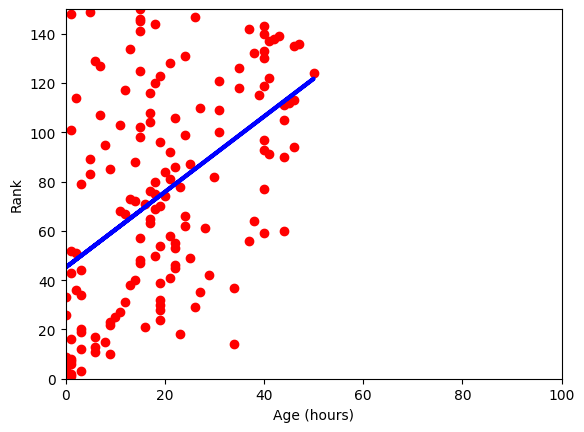

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from   sklearn import linear_model

plt.scatter(x = df['ages'], y = df['Ranks'], color='red')
xs = np.linspace(0, 2000, 2)

plt.plot( df['ages'], rank3_ols.predict(), color='blue', linewidth=3 )
plt.xlim(0, 100)
plt.ylim(0, 150)
plt.ylabel('Rank')
plt.xlabel('Age (hours)')

In [19]:
import plotly.express as px
scatterData = df.loc[:,['Ranks', 'titleLengths', 'ages', 'scores', 'comments']]
fig = px.scatter_matrix(scatterData, dimensions=['Ranks', 'titleLengths', 'ages', 'scores', 'comments'])
fig.update_layout(height=800, width=1200)
fig.show()

not really any linear relationships between any of the variables except a slight one between scores(points) and comments.

# Part 3 - Classification

In [20]:
def front_to_numeric(x):
    if x<=30:
        return 1
    else: 
        return 0
    
dfMod = df.copy()

dfMod["Ranks"] = df["Ranks"].apply(front_to_numeric)
dfMod.head(10)

,Ranks,titleLengths,ages,scores,comments
0,1,64,1,135,99
1,1,49,1,44,5
2,1,39,3,114,49
3,1,61,0,16,3
4,1,41,0,20,7
5,1,43,1,37,7
6,1,63,1,29,5
7,1,41,1,137,154
8,1,43,0,5,0
9,1,85,9,246,192


In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

r_all  = smf.logit( "Ranks ~ titleLengths + ages + scores + comments", data=dfMod ).fit( disp=0 )
print( "Front vs All:  %.2f%%" % ( r_all.prsquared * 100 ) )
r_all.summary()

Front vs All:  27.10%


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Ranks   No. Observations:                  150
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                            4
Date:                Wed, 14 Jun 2023   Pseudo R-squ.:                  0.2710
Time:                        09:19:03   Log-Likelihood:                -54.717
converged:                       True   LL-Null:                       -75.060
Covariance Type:            nonrobust   LLR p-value:                 3.121e-08
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7449      0.901      1.936      0.053      -0.022       3.512
titleLengths    -0.0210      0.012     -1.713      0.087      -0.045       0.003
ages            -0.1520      0.034     -4.493      0.000      -0.218      -0.086
scores           0.0031      0.002      1.461      0.144      -0.001       0.007
comments        -0.0019      0.004     -0.470      0.638      -0.010       0.006
================================================================================
"""

Text(0, 0.5, 'Rank')

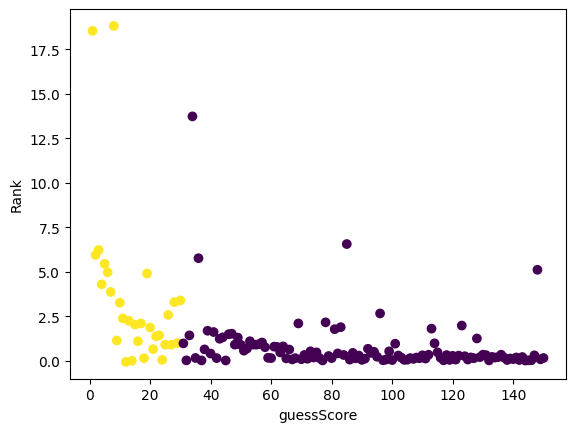

In [22]:
#Score = (P-1) / (T+2)^G
from   matplotlib.pyplot import plot
from   matplotlib import pyplot as plt

guesScores = (dfMod['scores'] - 1) / ((dfMod['ages'] + 2) ** 1.8)
plt.scatter(df['Ranks'], guesScores, c=dfMod.Ranks, cmap="viridis")
dfMod['guessScores'] = guesScores
plt.xlabel("guessScore")
plt.ylabel("Rank")

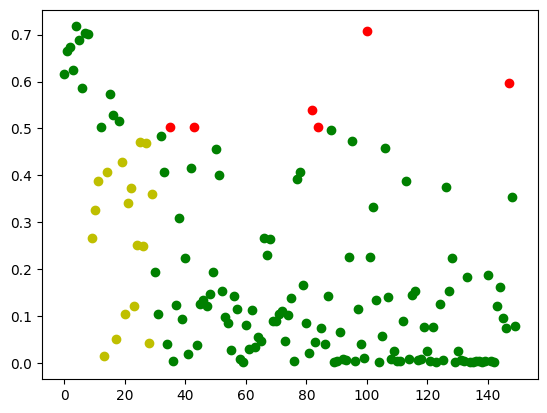

In [23]:
from   matplotlib.pyplot import plot
from   matplotlib import pyplot as plt

x_train = dfMod[ [ "titleLengths", "ages", "scores", "comments" ] ]
dfMod[ "train_predictions" ] = r_all.predict( x_train )


# Plot predicted admit that were admitted
df_correct = dfMod[ (dfMod.train_predictions >= 0.5) & (dfMod.Ranks == 1.0) ]
plot( df_correct.train_predictions, 'go' )

# Plot predicted non-admit that were not admitted
df_correct = dfMod[ (dfMod.train_predictions < 0.5) & (dfMod.Ranks == 0.0) ]
plot( df_correct.train_predictions, 'go' )

# Plot predicted admit that were NOT admitted
df_false_pos = dfMod[ (dfMod.train_predictions >= 0.5) & (dfMod.Ranks == 0.0) ]
plot( df_false_pos.train_predictions, 'ro' )

# Plot predicted NOT-admit that were admitted
df_false_neg = dfMod[ (dfMod.train_predictions < 0.5) & (dfMod.Ranks == 1.0) ]
plot( df_false_neg.train_predictions, 'yo' )

Optimization terminated successfully.
         Current function value: 0.420620
         Iterations 6


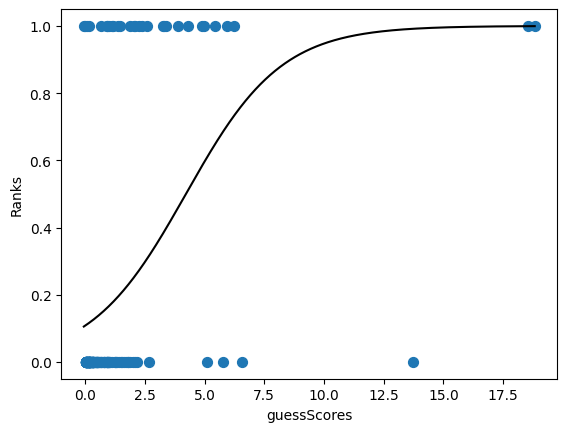

In [24]:
exam_model = smf.logit(formula="Ranks ~ guessScores", data=dfMod).fit()
exam_model.summary()

dfMod.plot.scatter( x='guessScores', y='Ranks', s=50 )

logistic = lambda x: 1 / ( 1 + np.exp(-x) )

par = dict( exam_model.params )

xs = np.linspace( dfMod['guessScores'].min(), dfMod['guessScores'].max(), 1000 )
ys = logistic( par['Intercept'] + par['guessScores']*xs )
plt.plot( xs, ys, color='Black' )

Optimization terminated successfully.
         Current function value: 0.388231
         Iterations 7


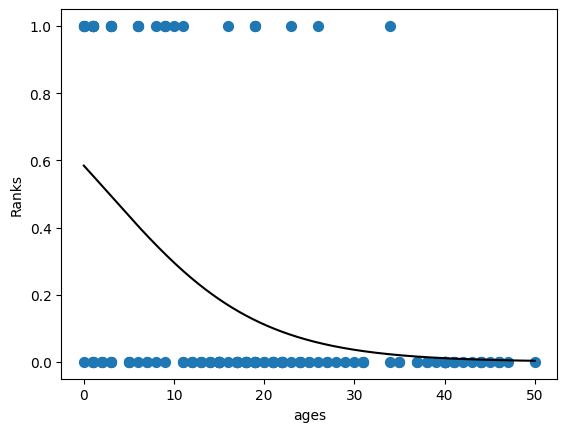

In [25]:
exam_model = smf.logit(formula="Ranks ~ ages", data=dfMod).fit()
exam_model.summary()

dfMod.plot.scatter( x='ages', y='Ranks', s=50 )

logistic = lambda x: 1 / ( 1 + np.exp(-x) )

par = dict( exam_model.params )

xs = np.linspace( dfMod['ages'].min(), dfMod['ages'].max(), 1000 )
ys = logistic( par['Intercept'] + par['ages']*xs )
plt.plot( xs, ys, color='Black' )

Optimization terminated successfully.
         Current function value: 0.498164
         Iterations 6


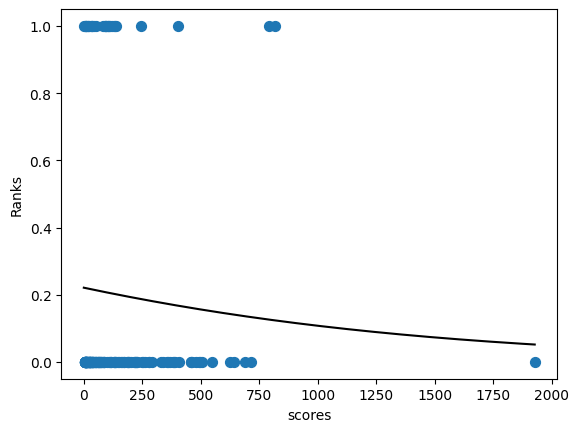

In [26]:
exam_model = smf.logit(formula="Ranks ~ scores", data=dfMod).fit()
exam_model.summary()

dfMod.plot.scatter( x='scores', y='Ranks', s=50 )

logistic = lambda x: 1 / ( 1 + np.exp(-x) )

par = dict( exam_model.params )

xs = np.linspace( dfMod['scores'].min(), dfMod['scores'].max(), 1000 )
ys = logistic( par['Intercept'] + par['scores']*xs )
plt.plot( xs, ys, color='Black' )